In [1]:
import numpy as np 
import cv2 #opencv impoted
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
img = cv2.imread('./test_images/m_45 .jpg')
img.shape

(251, 201, 3)

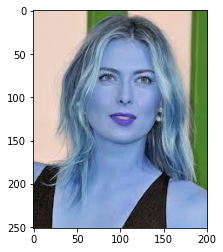

In [3]:
plt.imshow(img)

In [4]:
# convetting image to gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(251, 201)

In [5]:
gray # understandung the array

array([[208, 208, 208, ...,  92,  92,  92],
       [208, 208, 208, ...,  92,  92,  92],
       [208, 208, 208, ...,  92,  92,  92],
       ...,
       [ 28,  31,  34, ..., 191, 191, 189],
       [ 28,  31,  34, ..., 191, 191, 189],
       [ 28,  32,  35, ..., 191, 191, 189]], dtype=uint8)

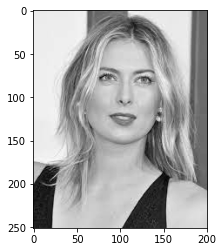

In [6]:
plt.imshow(gray, cmap='gray')

### DETECTING FACE AND EYES USING OPEN CV CV2

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[ 53,  38, 105, 105]], dtype=int32)

In [8]:
# storing the face 
(x,y,w,h) = faces[0]
x,y,w,h

(53, 38, 105, 105)

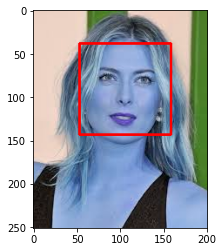

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

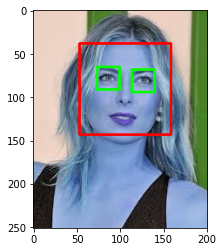

In [10]:
# draw the two eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

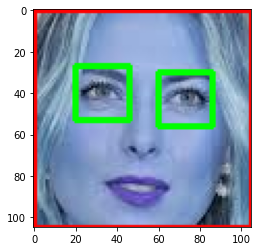

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') # roi means region of interest

we will crop the fae off all images and keep in a seperate folder for model training

In [12]:
# function that inputs the image and returns the cropped face and eye
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

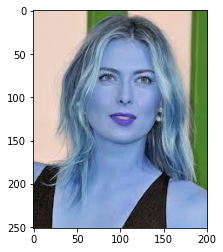

In [13]:
original_image = cv2.imread('./test_images/m_45 .jpg')
plt.imshow(original_image)

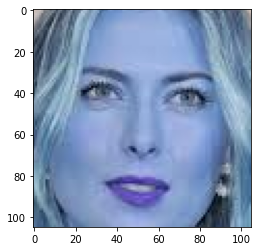

In [14]:

cropped_image = get_cropped_image_if_2_eyes('./test_images/m_45 .jpg')
plt.imshow(cropped_image)

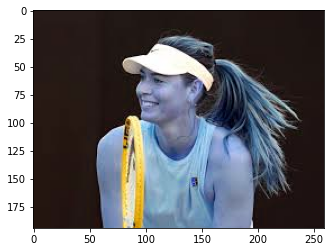

In [15]:
original_image_obstructed = cv2.imread('./test_images/m_35 .jpg')
plt.imshow(original_image_obstructed)


In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/m_35 .jpg')
cropped_image_no_2_eyes

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/lionel_messi/l_4 .jpg')
cropped_image_no_2_eyes

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./dataset/maria_sharapova/m_35 .jpg')
cropped_image_no_2_eyes

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data): # go tough each sports person folder in dataset folder
    #print(entry.path)
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [22]:
#creating crop folder
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data) # here if folder exits remove folder
os.mkdir(path_to_cr_data) # make directory 

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


### FEATURE ENGINEERING using wavelet transform

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

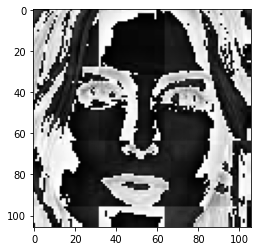

In [42]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap="gray")

##### Now you should have cropped folder under datasets folder that contains cropped images
Manually examine cropped folder and delete any unwanted images¶

In [26]:
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_messi18.png',
  '

In [28]:
# CREATING a class dict numner for celebrity names
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

#### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [44]:
x=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image) # reading the image
        scalled_raw_img = cv2.resize(img,(32,32)) # resize or scaling the images
        img_har = w2d(img,'db1',5) #wavwlet transformed image in same dimension
        scalled_img_har = cv2.resize(img_har,(32,32))
        # vertically stacking both images
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        

In [38]:
32*32*3  + 32*32 # 3 ->RGB

4096

In [45]:
len(x[0])

4096

In [46]:
x[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [47]:
# conerting X to float
x= np.array(x).reshape(len(x),4096).astype(float)
x.shape # toatal 131 images where each image with 4096 datapoints

(131, 4096)

In [43]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

#### Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# sklearn pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7878787878787878

In [51]:
len(x_test)

33

In [53]:
#detailed statistics
print(classification_report(y_test, pipe.predict(x_test)))


              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.77      1.00      0.87        10
           2       1.00      0.25      0.40         4
           3       1.00      0.67      0.80         6
           4       0.60      1.00      0.75         6

    accuracy                           0.79        33
   macro avg       0.87      0.73      0.73        33
weighted avg       0.86      0.79      0.77        33



Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters¶

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.785789,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.684737,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.794737,{'logisticregression__C': 1}


In [58]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [59]:
best_estimators['svm'].score(x_test,y_test)

0.7878787878787878

In [60]:
best_estimators['random_forest'].score(x_test,y_test)

0.5151515151515151

In [63]:
best_estimators['logistic_regression'].score(x_test,y_test) #validation set

0.9393939393939394

In [64]:

best_clf = best_estimators['logistic_regression']

In [65]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[7, 0, 0, 0, 0],
       [0, 9, 0, 1, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 1, 5, 0],
       [0, 0, 0, 0, 6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

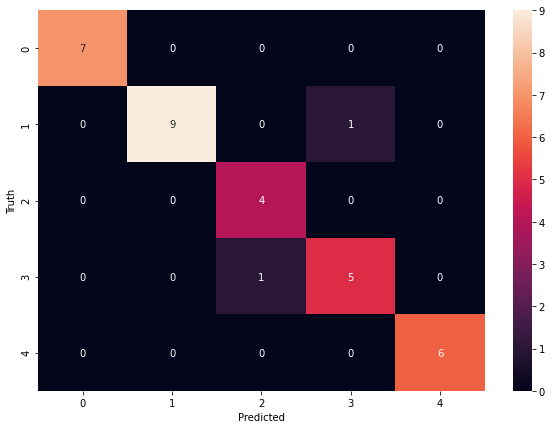

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Save the trained model

In [68]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

Save class dictionary

In [69]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))